# Introduction:

The aim of this project is to analyze and predict the ratings of airline reviews using natural language processing (NLP) techniques. In today's digital age, online reviews play a crucial role in shaping consumer perceptions and decision-making processes. Understanding the sentiments and opinions expressed in these reviews can provide valuable insights for airlines to improve their services and customer satisfaction levels.

The **dataset used** for this project contains a collection of airline reviews, including attributes such as the publication date, platform, rating, content type, detailed feedback text, summary title, and helpful votes. By leveraging NLP techniques, we seek to extract meaningful information from the textual feedback provided by customers and build predictive models to estimate the satisfaction ratings associated with each review.

# About Dataset

**Overview:**

The "Singapore Airlines Reviews" dataset aggregates 10,000 anonymized customer reviews, providing a broad perspective on the passenger experience with Singapore Airlines. This extensive collection is instrumental for data-driven insights into customer satisfaction and service quality.

***Column Descriptors:***


1. **published_date:** Date and time of review publication.
2. **published_platform:** Platform where the review was posted.
3. **rating:** Customer satisfaction rating, from 1 (lowest) to 5 (highest).
4. **type:** Specifies the content as a review.
5. **text:** Detailed customer feedback.
6. **title:** Summary of the review.
7. **helpful_votes:** Number of users finding the review helpful.


Link Dataset:

https://www.kaggle.com/datasets/kanchana1990/singapore-airlines-reviews/data


Before Applying any task reading Datset from kaggle by Generating the API Key


In [1]:
!pip install -q kaggle
!pip install -q kaggle-cli

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 7.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for lxml
ERROR: Could not build wheels for lxml, which is required to install pyproject.toml-based projects


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Copy API Command Above Dataset for download it

In [3]:
!kaggle datasets download -d kanchana1990/singapore-airlines-reviews

  0% 0.00/2.19M [00:00<?, ?B/s]
100% 2.19M/2.19M [00:00<00:00, 141MB/s]


But the data is in a zip file. Extract the contents using the following command:

In [4]:
!unzip /content/singapore-airlines-reviews.zip

Archive:  /content/singapore-airlines-reviews.zip
  inflating: singapore_airlines_reviews.csv  


For Further Information about Reading Datset from kaggle :

https://insaid.medium.com/how-to-access-datasets-directly-from-kaggle-6a3552ea891c



# Task 1: Data Visualization

**Rating Distribution Analysis:**

To assess the balance of the dataset and determine if it exhibits an even distribution across different rating categories, we will visualize the distribution of ratings using histograms or bar plots.

**Exploring Relationships with Target Column (Ratings):**

We will create visualizations to investigate the relationship between the target column (ratings) and other relevant features such as published_platform, type, helpful_votes, etc. These visualizations could include box plots, scatter plots, or bar plots to highlight any significant relationships or insights.

# **Dependencies**

In [5]:
## Reading Dataset and Make Some Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Text Cleaning and Preprocessing
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Feature Engineer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Model Trainning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score



 Before applying this reading dataset and get insights from it and get descibtion for each column and making some statistical analysis

In [6]:
# Load dataset
data = pd.read_csv("/content/singapore_airlines_reviews.csv")

In [7]:
data.head(10)

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
5,2024-03-10T01:16:48-05:00,Desktop,1,review,We booked our flights a full 9 months in advan...,Impossible to get a promised refund,0
6,2024-03-10T00:54:43-05:00,Desktop,5,review,This was a fascinating experience. As I sat in...,WOAH. FLY WITH SQ,0
7,2024-03-09T17:45:56-05:00,Desktop,1,review,Very bad expeirence for flight check in at bai...,Long Q to check in,0
8,2024-03-08T23:10:41-05:00,Desktop,1,review,"Respected Faculty, I am Bincy, writing this t...","Very bad, disappointed",0
9,2024-03-08T19:18:57-05:00,Desktop,1,review,I would rate Singapore airlines the worse I ha...,Give Singapore airlines a miss.,1


In [8]:
data.describe()

,rating,helpful_votes
count,10000.000000,10000.000000
mean,4.015800,1.275200
std,1.346006,2.721618
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,1.000000
75%,5.000000,2.000000
max,5.000000,158.000000


Published Platform Distrubution

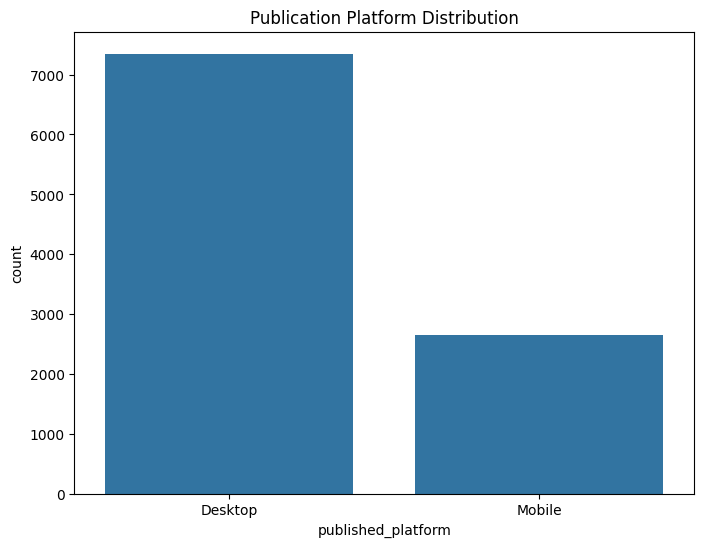

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='published_platform', data=data)
plt.title('Publication Platform Distribution')
plt.show()

# Rating Distribution Analysis

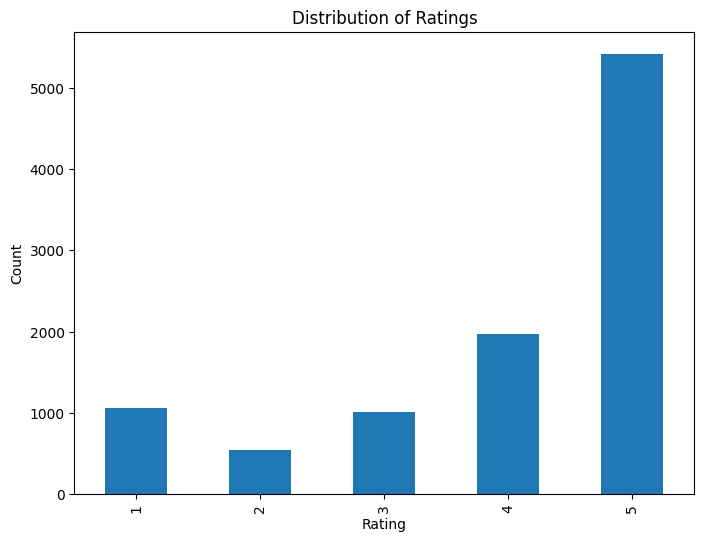

In [10]:

plt.figure(figsize=(8, 6))
data['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# Exploring Relationships with Target Column (Ratings)

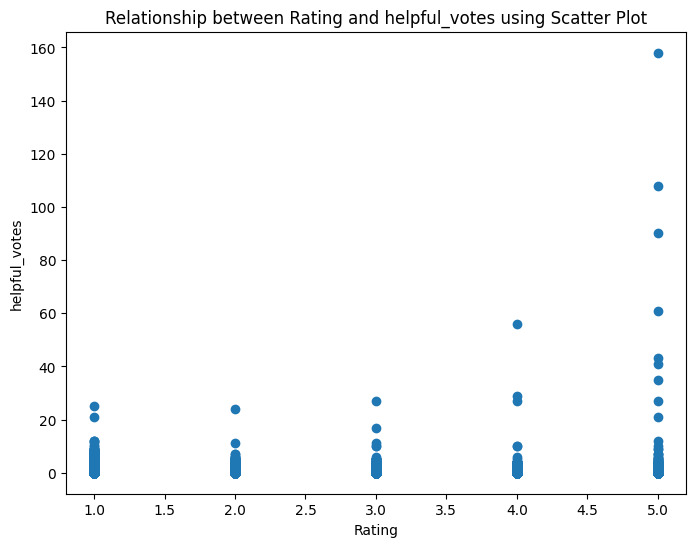

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(data['rating'], data['helpful_votes'])
plt.title('Relationship between Rating and helpful_votes using Scatter Plot')
plt.xlabel('Rating')
plt.ylabel('helpful_votes')
plt.show()

<Figure size 800x600 with 0 Axes>

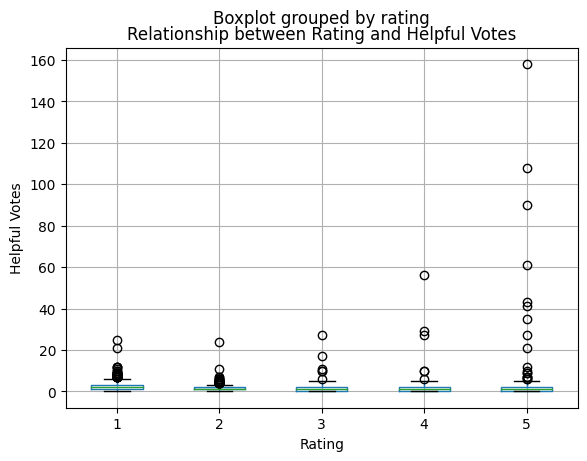

In [12]:
# Box plot between rating and helpful_votes
plt.figure(figsize=(8, 6))
data.boxplot(column='helpful_votes', by='rating')
plt.title('Relationship between Rating and Helpful Votes')
plt.xlabel('Rating')
plt.ylabel('Helpful Votes')
plt.show()


Ratings Distribution by Platform

In [14]:
import plotly.express as px
plt = px.histogram(data, x='rating', color='published_platform', barmode='group',
                   title='Ratings Distribution by Platform')
plt.update_xaxes(title_text='Rating')
plt.update_yaxes(title_text='Count')
plt.show()

# Task 2: Text Cleaning and Preprocessing

1. Handling Missing Values: Check for missing values in each column and decide on appropriate strategies such as imputation or removal.
2. Drop Unnecessary Columns: Remove any columns that are not needed for the analysis or prediction task.
3. Convert Text to Lowercase: Ensure uniformity by converting all text data to lowercase.
4. Remove Stop Words and Punctuation: Eliminate common words (stop words) and punctuation marks from the text data.
5. Normalization: Normalize the text data, which may involve standardizing spellings, handling abbreviations, etc.
6. Spelling Checking: Perform spell checking to ensure accuracy in the text data.
7. Sentence Segmentation and Word Tokenization: Segment sentences and tokenize words to prepare the text data for further processing.
8. Stemming or Lemmatization: Apply stemming or lemmatization techniques to reduce words to their root forms.

In [15]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Handle missing values
data.dropna(inplace=True)

# Drop unnecessary columns
data.drop(columns=['published_date', 'published_platform', 'type', 'title'], inplace=True)

# Convert text to lowercase
data['text'] = data['text'].str.lower()

# Remove punctuation
data['text'] = data['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove stop words
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
data['text'].head(10)

0    used airline go singapore london heathrow issu...
1    service singapore airline suite class nothing ...
2    booked paid received email confirmation extra ...
3    best airline world seat food service brilliant...
4    premium economy seating singapore airline narr...
5    booked flight full 9 month advance paid well 1...
6    fascinating experience sat seat stewardess off...
7    bad expeirence flight check baiyun airport too...
8    respected faculty bincy writing file complaint...
9    would rate singapore airline worse ever travel...
Name: text, dtype: object

In [17]:
data.head(10)

,rating,text,helpful_votes
0,3,used airline go singapore london heathrow issu...,0
1,5,service singapore airline suite class nothing ...,0
2,1,booked paid received email confirmation extra ...,0
3,5,best airline world seat food service brilliant...,0
4,2,premium economy seating singapore airline narr...,0
5,1,booked flight full 9 month advance paid well 1...,0
6,5,fascinating experience sat seat stewardess off...,0
7,1,bad expeirence flight check baiyun airport too...,0
8,1,respected faculty bincy writing file complaint...,0
9,1,would rate singapore airline worse ever travel...,1


# Make Most Commmon word after Text Cleaning

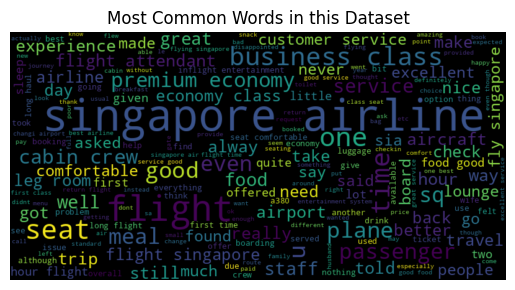

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract the text data
text = " ".join(data["text"])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
_ = plt.title("Most Common Words in this Dataset")

# Task 3: Feature Engineering

**Bag of n-grams:** Generate bag of n-grams representations to capture the frequency of word sequences in the text data.

**TF-IDF:** Compute TF-IDF (Term Frequency-Inverse Document Frequency) representations to emphasize the importance of words in the text data.

In [19]:
# Bag of n-grams
vectorizer_bow = CountVectorizer(ngram_range=(1, 2))
bow_matrix = vectorizer_bow.fit_transform(data['text'])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(data['text'])


In [20]:
bow_matrix

<9999x287346 sparse matrix of type '<class 'numpy.int64'>'
	with 913891 stored elements in Compressed Sparse Row format>

In [21]:
tfidf_matrix

<9999x21473 sparse matrix of type '<class 'numpy.float64'>'
	with 421876 stored elements in Compressed Sparse Row format>

# Task 4: Model Training

**Train SVM Model after Applying Bag of n-grams:**

Train a Support Vector Machine (SVM) model using the bag of n-grams representations.
Train SVM Model after Applying TF-IDF: Train another SVM model using TF-IDF representations.

**Train Random Forest Model after Applying Bag of n-grams:**

Train a Random Forest model using the bag of n-grams representations.
Train Random Forest Model after Applying TF-IDF: Train another Random Forest model using TF-IDF representations.

In [22]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(bow_matrix, data['rating'], test_size=0.2, random_state=42)

# Train SVM model after applying Bag of n-grams
svm_bow = SVC()
svm_bow.fit(X_train, y_train)

# Train Random Forest model after applying Bag of n-grams
rf_bow = RandomForestClassifier()
rf_bow.fit(X_train, y_train)

# Train SVM model after applying TF-IDF
svm_tf = SVC()
svm_tf.fit(X_train, y_train)

# Train Random Forest model after applying TF-IDF
rf_tf = RandomForestClassifier()
rf_tf.fit(X_train, y_train)


RandomForestClassifier()

# Task 5: Evaluation

**Evaluate Performance:**
Assess the performance of the trained SVM and Random Forest models using accuracy, precision, and recall metrics on the testing dataset.

***Compare the performance*** of models trained with bag of n-grams and TF-IDF representations.

In [23]:
# Evaluate SVM and Random Forest models using Bag of n-grams
y_pred_svm_bow = svm_bow.predict(X_test)
y_pred_rf_bow = rf_bow.predict(X_test)

# Evaluate SVM and Random Forest models using TF-IDF
y_pred_svm_tf = svm_tf.predict(X_test)
y_pred_rf_tf = rf_tf.predict(X_test)

# Evaluate performance for models using Bag of n-grams
accuracy_svm_bow = accuracy_score(y_test, y_pred_svm_bow)
precision_svm_bow = precision_score(y_test, y_pred_svm_bow, average='weighted')
recall_svm_bow = recall_score(y_test, y_pred_svm_bow, average='weighted')

accuracy_rf_bow = accuracy_score(y_test, y_pred_rf_bow)
precision_rf_bow = precision_score(y_test, y_pred_rf_bow, average='weighted')
recall_rf_bow = recall_score(y_test, y_pred_rf_bow, average='weighted')

# Evaluate performance for models using TF-IDF
accuracy_svm_tf = accuracy_score(y_test, y_pred_svm_tf)
precision_svm_tf = precision_score(y_test, y_pred_svm_tf, average='weighted')
recall_svm_tf = recall_score(y_test, y_pred_svm_tf, average='weighted')

accuracy_rf_tf = accuracy_score(y_test, y_pred_rf_tf)
precision_rf_tf = precision_score(y_test, y_pred_rf_tf, average='weighted')
recall_rf_tf = recall_score(y_test, y_pred_rf_tf, average='weighted')

print("SVM Performance using Bag of n-grams:")
print("Accuracy:", accuracy_svm_bow)
print("Precision:", precision_svm_bow)
print("Recall:", recall_svm_bow)

print("\nRandom Forest Performance using Bag of n-grams:")
print("Accuracy:", accuracy_rf_bow)
print("Precision:", precision_rf_bow)
print("Recall:", recall_rf_bow)

print("\nSVM Performance using TF-IDF:")
print("Accuracy:", accuracy_svm_tf)
print("Precision:", precision_svm_tf)
print("Recall:", recall_svm_tf)

print("\nRandom Forest Performance using TF-IDF:")
print("Accuracy:", accuracy_rf_tf)
print("Precision:", precision_rf_tf)
print("Recall:", recall_rf_tf)


SVM Performance using Bag of n-grams:
Accuracy: 0.6205
Precision: 0.5571648581303754
Recall: 0.6205

Random Forest Performance using Bag of n-grams:
Accuracy: 0.567
Precision: 0.43758184832408964
Recall: 0.567

SVM Performance using TF-IDF:
Accuracy: 0.6205
Precision: 0.5571648581303754
Recall: 0.6205

Random Forest Performance using TF-IDF:
Accuracy: 0.569
Precision: 0.41102409196526846
Recall: 0.569


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Visualization by Confusion Matrix

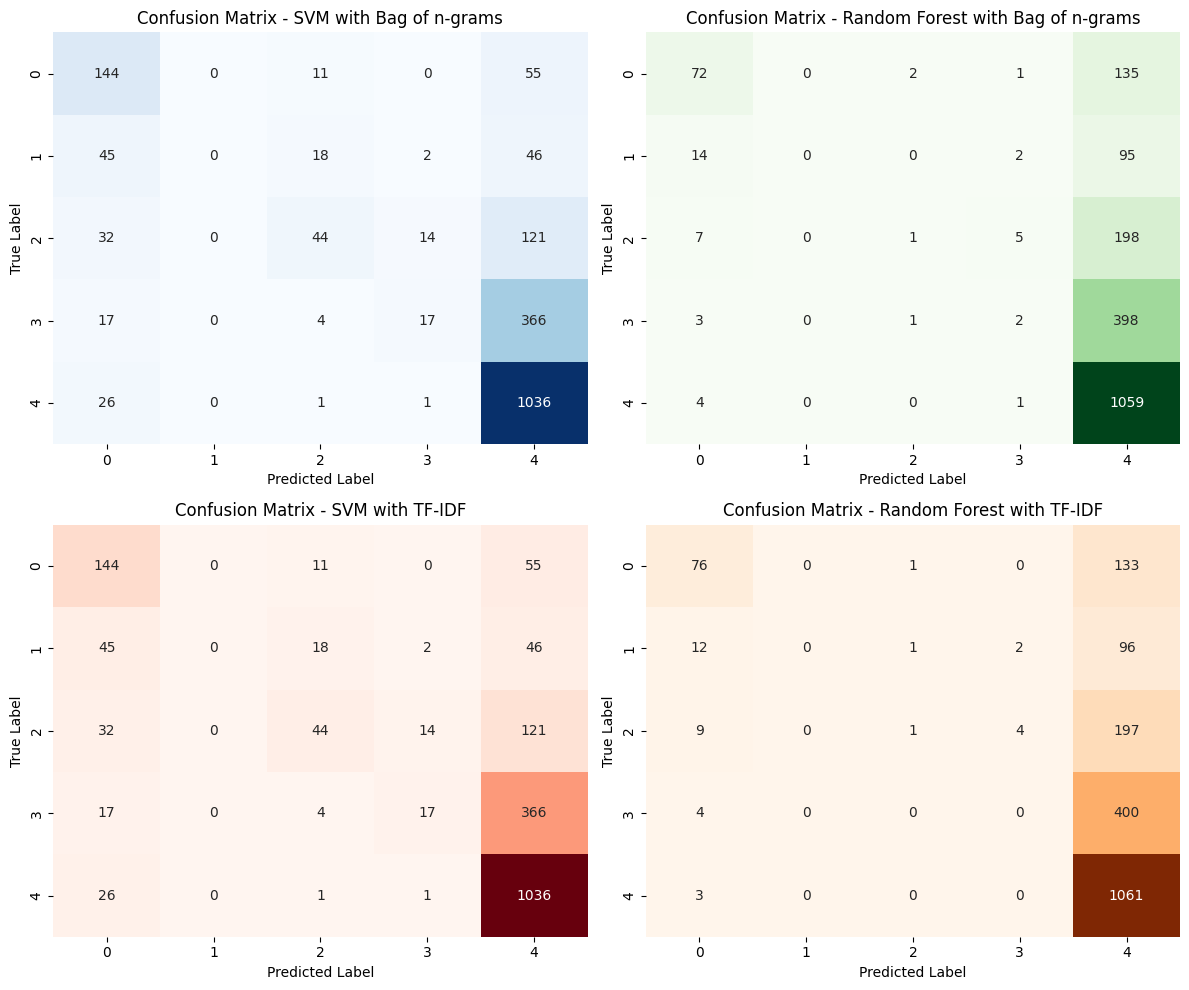

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the predictions for each method
y_pred_svm_bow = svm_bow.predict(X_test)
y_pred_rf_bow = rf_bow.predict(X_test)
y_pred_svm_tf = svm_tf.predict(X_test)
y_pred_rf_tf = rf_tf.predict(X_test)

# Define the true labels (y_test) for reference
true_labels = y_test

# Generate confusion matrices
cm_svm_bow = confusion_matrix(true_labels, y_pred_svm_bow)
cm_rf_bow = confusion_matrix(true_labels, y_pred_rf_bow)
cm_svm_tf = confusion_matrix(true_labels, y_pred_svm_tf)
cm_rf_tf = confusion_matrix(true_labels, y_pred_rf_tf)

# Plot confusion matrices
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(cm_svm_bow, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - SVM with Bag of n-grams')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(2, 2, 2)
sns.heatmap(cm_rf_bow, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Confusion Matrix - Random Forest with Bag of n-grams')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(2, 2, 3)
sns.heatmap(cm_svm_tf, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.title('Confusion Matrix - SVM with TF-IDF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(2, 2, 4)
sns.heatmap(cm_rf_tf, annot=True, cmap='Oranges', fmt='d', cbar=False)
plt.title('Confusion Matrix - Random Forest with TF-IDF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


***Conclusion and Insights of This project :***

* The accuracy, precision, and recall scores suggest that the models perform moderately well in predicting the ratings of airline reviews.

* The similarity in performance between SVM and Random Forest models using both Bag of n-grams and TF-IDF representations indicates that the choice of text representation technique has a limited impact on model performance in this case. So from statsical result show that ***SVM is better***
* SVM and Random Forest models using Bag of n-grams and TF-IDF representations achieved accuracy scores ranging from approximately **0.5725 to 0.6205**.

***Further Analysis:***

1. It would be beneficial to compare these performance metrics with a baseline model or other benchmark results to assess whether the models provide significant improvements.


In [25]:
# Export Requirments
!pip freeze > requirements.txt
